In [1]:
from imports import * 
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

In [2]:
campaigns = preprocessing.load_campaign()
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    exposures = pickle.load(f)

In [3]:
import trending
with open(os.path.join(TWITTER_DATA_DIR, 'trending_rankings.pkl'), 'rb') as f:
    trending_rankings = pickle.load(f)

# Panel Data
Ok, so I want to include the following options:
Treatment time:
    
    - earliest
    - best 
    - donut hole uncertainty 
    
Trending location cutoffs:
    - 10
    - 25
    - 50 (None)

In [4]:
cutoff_choices = ['best', 'earliest']
#cutoff_choice = ['earliest']
trending_cutoffs = [10, 25, 50]

In [5]:
df_dict = {}
for cutoff_choice, trending_thresh in list(itertools.product(cutoff_choices, trending_cutoffs)):
    dfs = []
    for hashtag, tweet_dict in tqdm(campaigns.items()):
        if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
            temp, _ = trending.build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='5Min',
                                        cutoff_choice=cutoff_choice, include_missing=False, 
                                        user_exposes_himself=False, trending_loc_cutoff=trending_thresh)
            if temp is not None:
                temp = temp.assign(threshold=(temp.time > 0).astype(int))
                temp['hashtag'] = hashtag
                dfs.append(temp)
        
    df_dict[(cutoff_choice, trending_thresh)] = pd.concat(dfs)

KeyboardInterrupt: 

In [145]:
df_dict2 = {}
for cutoff_choice, trending_thresh in list(itertools.product(cutoff_choices, trending_cutoffs)):
    dfs = []
    for hashtag, tweet_dict in tqdm(campaigns.items()):
        if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
            temp, _ = trending.build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='5Min',
                                        cutoff_choice=cutoff_choice, include_missing=False, 
                                        user_exposes_himself=False, trending_loc_cutoff=trending_thresh)
            if temp is not None:
                # add 0 values for missing stuff 
                lim = temp.time.max()
                temp = temp.reindex(pd.RangeIndex(-lim, lim, 5)).fillna(0)
                temp['time'] = temp.index
                temp = temp.assign(threshold=(temp.time > 0).astype(int))
                temp['hashtag'] = hashtag
                dfs.append(temp)
        
    df_dict2[(cutoff_choice, trending_thresh)] = pd.concat(dfs)

kiamadeinap  did not trend with location less than or equal to 10
dousupportnaxals  did not trend with location less than or equal to 10
mizoramwithmodi  did not trend with location less than or equal to 10
timesofrahul  did not trend with location less than or equal to 10
msmetextilesconclave  did not trend with location less than or equal to 10
bjp4jind  did not trend with location less than or equal to 10
technicaltextiles  did not trend with location less than or equal to 10
himachalkacu  did not trend with location less than or equal to 10
congaapbhaibhai  did not trend with location less than or equal to 10
sizeindia  did not trend with location less than or equal to 10
copypastencp  did not trend with location less than or equal to 10
bjp4betterandhra  did not trend with location less than or equal to 10
amethikididismritiirani  did not trend with location less than or equal to 10
corruptcongressfearsdemo  did not trend with location less than or equal to 10
yuvakemannkibaat  di

kiamadeinap  did not trend with location less than or equal to 25
mizoramwithmodi  did not trend with location less than or equal to 25
msmetextilesconclave  did not trend with location less than or equal to 25
technicaltextiles  did not trend with location less than or equal to 25
himachalkacu  did not trend with location less than or equal to 25
amethikididismritiirani  did not trend with location less than or equal to 25
yuvakemannkibaat  did not trend with location less than or equal to 25
namothon  did not trend with location less than or equal to 25
bjpforsamridhkisan  did not trend with location less than or equal to 25
shahforgandhinagar  did not trend with location less than or equal to 25
उत्तरप्रदेश_विजय_संकल्प  did not trend with location less than or equal to 25
removetraitorsfromdu  did not trend with location less than or equal to 25
jaihobc  did not trend with location less than or equal to 25



kiamadeinap  did not trend with location less than or equal to 10
dousupportnaxals  did not trend with location less than or equal to 10
mizoramwithmodi  did not trend with location less than or equal to 10
timesofrahul  did not trend with location less than or equal to 10
msmetextilesconclave  did not trend with location less than or equal to 10
bjp4jind  did not trend with location less than or equal to 10
technicaltextiles  did not trend with location less than or equal to 10
himachalkacu  did not trend with location less than or equal to 10
congaapbhaibhai  did not trend with location less than or equal to 10
sizeindia  did not trend with location less than or equal to 10
copypastencp  did not trend with location less than or equal to 10
bjp4betterandhra  did not trend with location less than or equal to 10
amethikididismritiirani  did not trend with location less than or equal to 10
corruptcongressfearsdemo  did not trend with location less than or equal to 10
yuvakemannkibaat  di

kiamadeinap  did not trend with location less than or equal to 25
mizoramwithmodi  did not trend with location less than or equal to 25
msmetextilesconclave  did not trend with location less than or equal to 25
technicaltextiles  did not trend with location less than or equal to 25
himachalkacu  did not trend with location less than or equal to 25
amethikididismritiirani  did not trend with location less than or equal to 25
yuvakemannkibaat  did not trend with location less than or equal to 25
namothon  did not trend with location less than or equal to 25
bjpforsamridhkisan  did not trend with location less than or equal to 25
shahforgandhinagar  did not trend with location less than or equal to 25
उत्तरप्रदेश_विजय_संकल्प  did not trend with location less than or equal to 25
removetraitorsfromdu  did not trend with location less than or equal to 25
jaihobc  did not trend with location less than or equal to 25



In [6]:
with open(os.path.join(TWITTER_DATA_DIR, 'panel_df_dict.pkl'), 'rb') as f:
    df_dict = pickle.load(f)

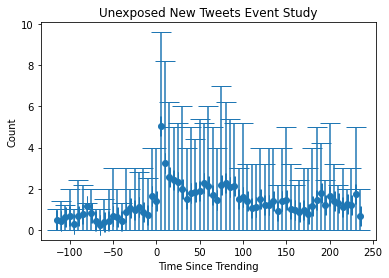

In [5]:
trending.plot_event_study(df_dict[('best', 25)], quantiles=(.1,.9), upper=240)
plt.title('Unexposed New Tweets Event Study')
plt.savefig(os.path.join(ASSETS_DIR, 'panel_event_study_best.png'))

Text(0.5, 1.0, 'Unexposed New Tweets Event Study')

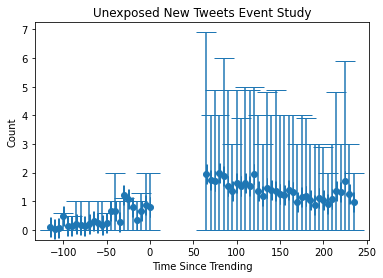

In [7]:
t = df_dict[('earliest', 50)]
t = t.query(f'time >= -120 and time <= 240')
t = t.query('time <= 0 or time > 60')

trending.plot_event_study(t, quantiles=(.1,.9), upper=240)
plt.title('Unexposed New Tweets Event Study')
# plt.savefig(os.path.join(ASSETS_DIR, 'panel_event_study_donut_hole.png'))

In [155]:
# with open(os.path.join(TWITTER_DATA_DIR, 'panel_df_dict.pkl'), 'wb') as f:
#     pickle.dump(df_dict, f)

## Creating Thesis Figures

In [17]:
from matplotlib import cm
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['figure.figsize'] = (12.0, 8)
mpl.rc('font',**{'family': 'sans-serif', 'weight': 'bold', 'size': 14})
mpl.rc('axes',**{'titlesize': 20, 'titleweight': 'bold', 'labelsize': 16, 'labelweight': 'bold'})
mpl.rc('legend',**{'fontsize': 14})
mpl.rc('figure',**{'titlesize': 16, 'titleweight': 'bold'})
mpl.rc('lines',**{'linewidth': 2.5, 'markersize': 18, 'markeredgewidth': 0})
mpl.rc('mathtext',**{'fontset': 'custom', 'rm': 'sans:bold', 'bf': 'sans:bold', 'it': 'sans:italic', 'sf': 'sans:bold', 'default': 'it'})

# plt.rc('text',usetex=False) # [default] usetex should be False

mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath,sfmath} \boldmath']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors_default = prop_cycle.by_key()['color']

In [59]:
def select_results2(cutoff_choices, trending_thresholds, windows):
    better_res_dict = {}
    for k, v in result_dict.items():
        x, y, z = k
        if x in cutoff_choices and int(y) in trending_thresholds and int(z) in windows:
            model_name = f'{k[0]}-{k[1]}-{k[2]}'
            param_name = 'threshold'
            better_res_dict[model_name] = {
                'p': v.pvalues[param_name],
                't': v.tvalues[param_name],
                'conf_low': v.conf_int().loc[param_name][0],
                'conf_high': v.conf_int().loc[param_name][1],
                'coef': v.params[param_name],
                'std_err': v.bse[param_name]
            }
    return pd.DataFrame.from_dict(better_res_dict)

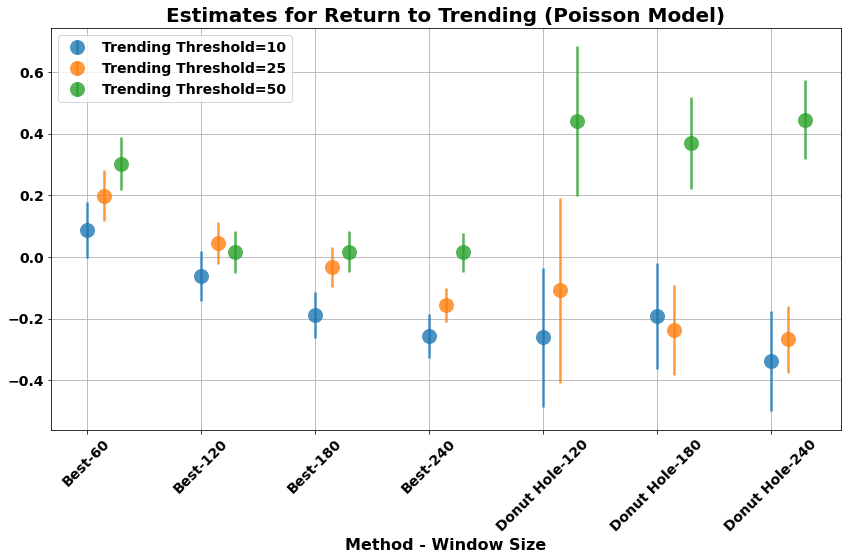

In [73]:
fig, ax = plt.subplots()
for i,n in enumerate([10,25,50]):
    x = select_results2(['best', 'Donut Hole'], [n], [60,120,180,240],)
    coefs = x.loc['coef', :]
    stds = x.loc['std_err',:].values
    label='Trending Threshold='+str(n)
    ax.errorbar([x+i*.15 for x in range(len(coefs))], coefs, stds, fmt='o', label=label, markersize=15, 
                alpha=.8, capsize=10)
    ax.set_xticks(range(len(coefs)))
    ax.set_xticklabels(format_columns(x.columns), rotation=45)

plt.legend()
plt.grid()
plt.xlabel('Method - Window Size')
plt.title(title)
plt.tight_layout()

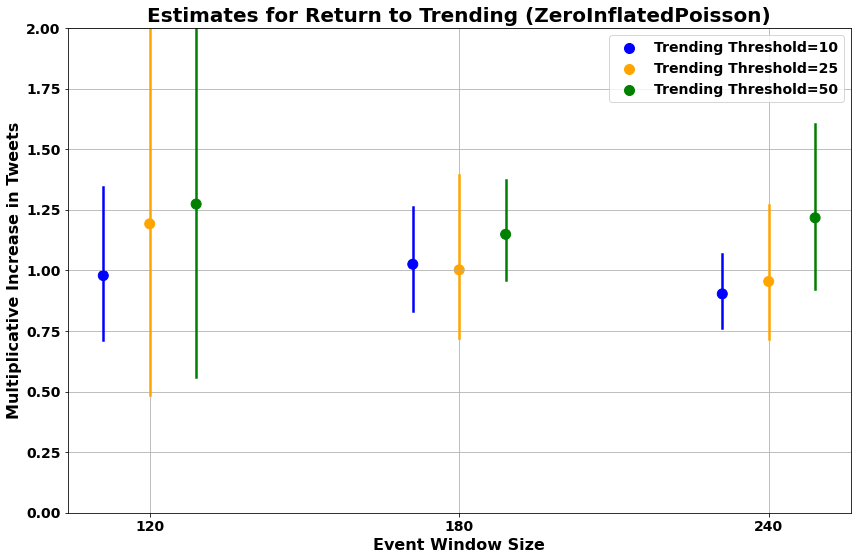

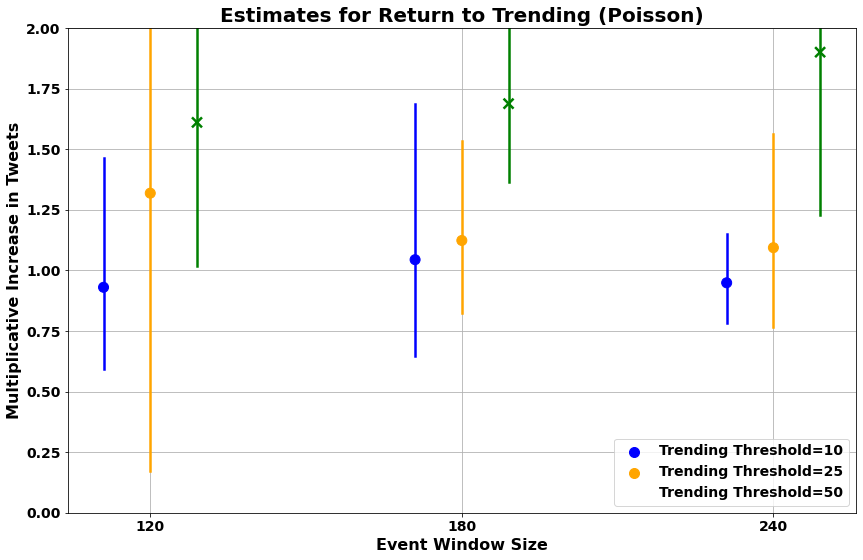

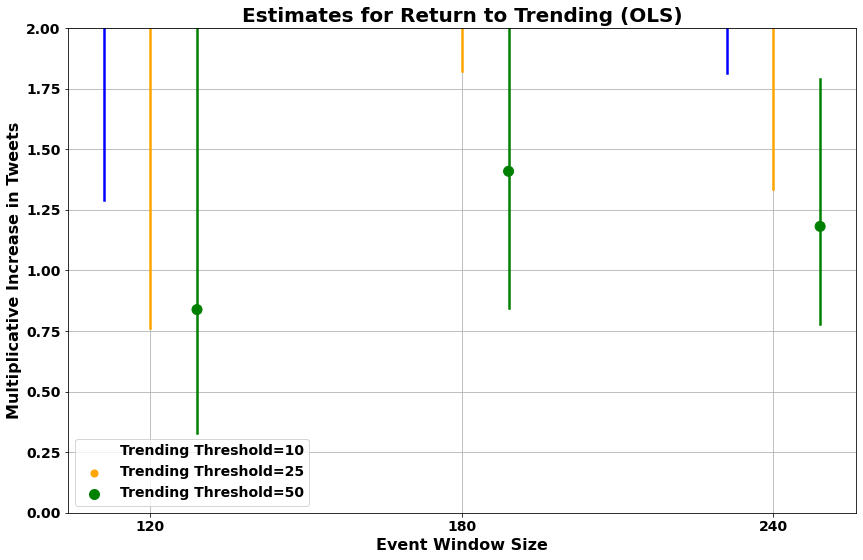

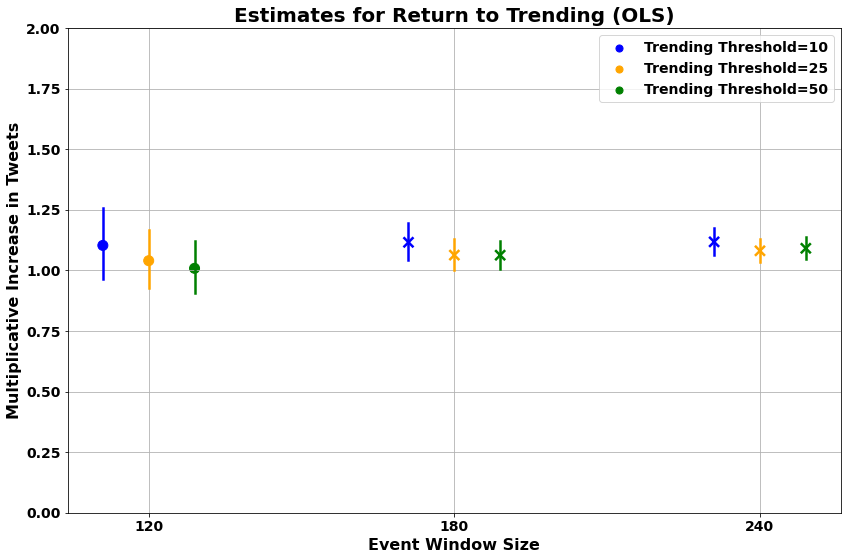

In [277]:
from statsmodels.regression.linear_model import OLS
from statsmodels.discrete import count_model as cm
from statsmodels.discrete import discrete_model as dm
import statsmodels.api as sm

def log(x):
    return np.log(x+1)
    if x == 0:
        return 0
    else:
        return np.log(x)

def prepare_data(df, logged=False):
    df['timeXthreshold'] = df['time'] * df['threshold']
    if logged:
        for col in ['regular', 'nonzero_exposure_regular']:
            df['ln_'+ col] = df[col].apply(log)

    endog = df['ln_regular'] if logged else df['regular']

    last_var = 'nonzero_exposure_regular'
    if logged:
        last_var = 'ln_' + last_var
        
    exog = df[['time', 'threshold', 'timeXthreshold', last_var]]
    exog['const'] = 1
    exog = pd.concat((exog, pd.get_dummies(df['hashtag'])), axis=1).fillna(0)
    return endog, exog

#models = [cm.ZeroInflatedPoisson, dm.Poisson, dm.NegativeBinomial, OLS, OLS]
models = [cm.ZeroInflatedPoisson, dm.Poisson, OLS, OLS]

first_ols = False
model_result_dict = {}
for model_type in models:
    result_dict = {}
    for opts, panel_df in df_dict.items():
        cutoff_choice, trending_thresh = opts   

        for end_time in [60, 120, 180, 240]:        
            query = panel_df.query(f'time >= -{end_time} and time <= {end_time}')
            query.hashtag = pd.Categorical(query.hashtag).codes
            mod = model_type(*prepare_data(query, logged=first_ols)).fit(cov_type='HC1', disp=False)

            result_dict[(cutoff_choice, trending_thresh, end_time)] = mod
            # donut hole!
            if cutoff_choice == 'earliest' and end_time != 60:
                query  = query.query('time <= 0 or time > 60')
                mod = model_type(*prepare_data(query, logged=first_ols)).fit(cov_type='HC1', disp=False)
                result_dict[('Donut Hole', trending_thresh, end_time)] = mod
    if model_type.__name__ == "OLS":
        first_ols = True
        
    fig, ax = plt.subplots()
    colors = ['blue', 'orange', 'green']
    for i,n in enumerate([10,25,50]):
        c = colors[i]
        x = select_results2(['Donut Hole'], [n], [60,120,180,240],)
        coefs = np.exp(x.loc['coef', :].values)
        conf_int = np.exp(x.loc['conf_low':'conf_high',:].T.values)
#         coefs = x.loc['coef', :].values
#         conf_int = x.loc['conf_low':'conf_high',:].T.values
        sig = x.loc['p', :] < .05
        big_size = 100
        sizes = [big_size if b else 0 for b in sig]
        sizes2 = [0 if b else big_size for b in sig]

        shapes = ['X' if b else 'o' for b in sig]
        label='Trending Threshold='+str(n)
        for xi, yi in zip([[x+(i-1)*.15]*2 for x in range(len(coefs))], conf_int):
            ax.plot(xi, yi, c=c)
        ax.scatter([x+(i-1)*.15 for x in range(len(coefs))], coefs, c=c, s=sizes2,
                   marker='o', label=label)
        ax.scatter([x+(i-1)*.15 for x in range(len(coefs))], coefs, c=c, s=sizes,
                   marker='x')

        ax.set_xticks(range(len(coefs)))
        ax.set_xticklabels([s[-3:] for s in x.columns])#, rotation=45)

    plt.legend()
    plt.grid()
    plt.xlabel('Event Window Size')
    plt.ylabel('Multiplicative Increase in Tweets')
    plt.title(f'Estimates for Return to Trending ({model_type.__name__})')
    plt.tight_layout()
    plt.ylim([0,2])
    model_result_dict[model_type.__name__] = result_dict

In [ ]:
fig, ax = plt.subplots()
colors = ['blue', 'orange', 'green']
for i,n in enumerate([10,25,50]):
    c = colors[i]
    x = select_results2(['Donut Hole'], [n], [60,120,180,240],)
    coefs = x.loc['coef', :]
    conf_int = x.loc['conf_low':'conf_high',:].T.values
    sig = x.loc['p', :] < .05
    big_size = 100
    sizes = [big_size if b else 0 for b in sig]
    sizes2 = [0 if b else big_size for b in sig]

    shapes = ['X' if b else 'o' for b in sig]
    label='Trending Threshold='+str(n)
    for xi, yi in zip([[x+(i-1)*.15]*2 for x in range(len(coefs))], conf_int):
        ax.plot(xi, yi, c=c)
    ax.scatter([x+(i-1)*.15 for x in range(len(coefs))], coefs, c=c, s=sizes,
               marker='o', label=label)
    ax.scatter([x+(i-1)*.15 for x in range(len(coefs))], coefs, c=c, s=sizes2,
               marker='x')
    
    ax.set_xticks(range(len(coefs)))
    ax.set_xticklabels([s[-3:] for s in x.columns])#, rotation=45)

plt.legend()
plt.grid()
plt.xlabel('Event Window Size')
plt.title('Estimates for Return to Trending (Poisson Model)')
plt.tight_layout()
plt.savefig(os.path.join(ASSETS_DIR, 'poisson_trending_estimates.png'))

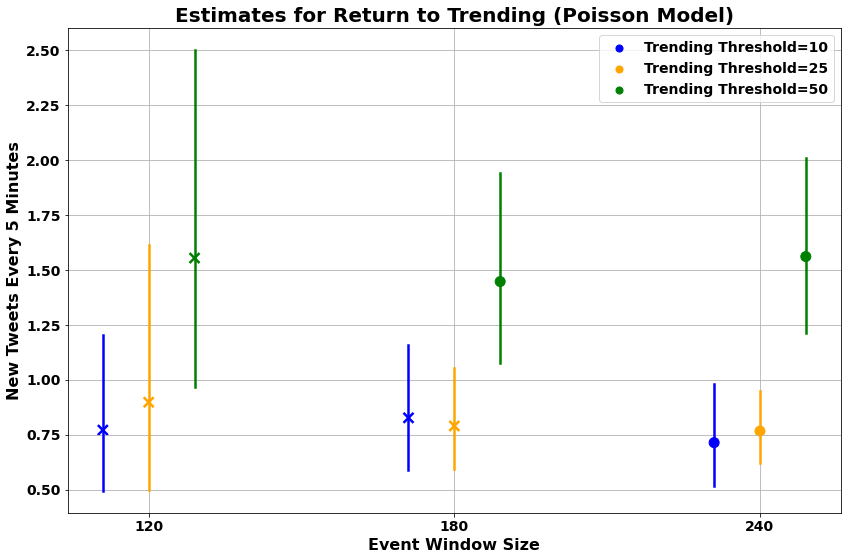

In [110]:
fig, ax = plt.subplots()
colors = ['blue', 'orange', 'green']
for i,n in enumerate([10,25,50]):
    c = colors[i]
    x = select_results2(['Donut Hole'], [n], [60,120,180,240],)
    coefs = np.exp(x.loc['coef', :].values)
    conf_int = np.exp(x.loc['conf_low':'conf_high',:].T.values)
    sig = x.loc['p', :] < .05
    big_size = 100
    sizes = [big_size if b else 0 for b in sig]
    sizes2 = [0 if b else big_size for b in sig]

    shapes = ['X' if b else 'o' for b in sig]
    label='Trending Threshold='+str(n)
    for xi, yi in zip([[x+(i-1)*.15]*2 for x in range(len(coefs))], conf_int):
        ax.plot(xi, yi, c=c)
    ax.scatter([x+(i-1)*.15 for x in range(len(coefs))], coefs, c=c, s=sizes,
               marker='o', label=label)
    ax.scatter([x+(i-1)*.15 for x in range(len(coefs))], coefs, c=c, s=sizes2,
               marker='x')
    
    ax.set_xticks(range(len(coefs)))
    ax.set_xticklabels([s[-3:] for s in x.columns])#, rotation=45)

plt.legend()
plt.grid()
plt.xlabel('Event Window Size')
plt.ylabel('New Tweets Every 5 Minutes')
plt.title('Estimates for Return to Trending (Poisson Model)')
plt.tight_layout()
plt.savefig(os.path.join(ASSETS_DIR, 'poisson_trending_estimates_interpretable.png'))

In [272]:
def select_results(tab, cutoff_choices, trending_thresholds, windows,
                  column_type='descriptions', add_model_param_rows=True,
                  param_names=['Cutoff Choice', 'Trending Threshold', 'Time after Trending']):
    
    var_map = {'time': 'Time', 'threshold': 'Trending', 'time:threshold': 'Time#Trending', 
              'nonzero_exposure_regular': 'Exposed',     'timeXthreshold': 'Time#Trending',
               'threshold': 'Trending', 'time:threshold': 'Time#Trending', 
              'nonzero_exposure_regular': 'Exposed', 'ln_nonzero_exposure_regular': 'Exposed (logged)',
              'const': 'Intercept'}


    # select columns 
    
    temp = tab.tables[0]    
    columns = []
    for col in temp.columns:
        x,y,z = col.split('-')

        if x in cutoff_choices and int(y) in trending_thresholds and int(z) in windows:
            columns.append(col)
    
    temp = temp[columns] 

    model_params = temp.columns
    
    if column_type == 'multiindex':
        temp.columns = pd.MultiIndex.from_tuples([tuple(x.split('-')) for x in temp.columns], names=param_names)
    elif column_type == 'numbers':
        temp.columns = [f'({i+1})' for i in range(len(temp.columns))]

    if add_model_param_rows:
        # make a row explaining each model parameter 
        temp_dict = {}
        for i, x in enumerate(model_params):
            temp_dict[temp.columns[i]] = x.split('-')        
        t = pd.DataFrame.from_dict(temp_dict)
        t.index = param_names
        temp = temp.append(t)
    temp.index = [var_map.get(x, x) for x in temp.index]
    
    return temp

In [290]:
res_tab

,best-10-60,best-10-120,best-10-180,best-10-240,best-25-60,best-25-120,best-25-180,best-25-240,best-50-60,best-50-120,best-50-180,best-50-240,earliest-10-60,earliest-10-120,Donut Hole-10-120,earliest-10-180,Donut Hole-10-180,earliest-10-240,Donut Hole-10-240,earliest-25-60,earliest-25-120,Donut Hole-25-120,earliest-25-180,Donut Hole-25-180,earliest-25-240,Donut Hole-25-240,earliest-50-60,earliest-50-120,Donut Hole-50-120,earliest-50-180,Donut Hole-50-180,earliest-50-240,Donut Hole-50-240
const,2.3911,2.3117,2.2649,2.2638,1.8788,1.8034,1.7296,1.7589,1.8072,1.7969,1.7431,1.7334,2.2564,2.1895,1.9930,2.2080,1.9934,2.2207,2.0085,1.5737,1.6951,1.5808,1.7885,1.7063,1.7894,1.7028,1.3776,1.5084,1.3710,1.5584,1.4481,1.5307,1.4228
,(212146.9552),(1442071.2983),(nan),(377173.4269),(nan),(869017.7473),(nan),(4151995.6087),(1102644.4235),(2555509.9888),(3407053.4607),(nan),(718098.4421),(1657343.4225),(1879550.4196),(8381468.2670),(2321898.2079),(nan),(2902558.1984),(nan),(nan),(5590723.0249),(nan),(4141023.7440),(nan),(nan),(4180731.1323),(4063411.7750),(nan),(3771580.3520),(nan),(nan),(958691.6219)
inflate_const,-2.2456***,-1.6598***,-1.3680***,-1.2191***,-2.0373***,-1.3762***,-1.0787***,-0.8989***,-1.6771***,-1.2096***,-1.0140***,-0.8944***,-1.4557***,-1.2095***,-0.9643***,-1.1073***,-0.9772***,-1.0661***,-0.9772***,-1.2774***,-1.0825***,-0.8026***,-0.8909***,-0.7366***,-0.7840***,-0.6782***,-1.0232***,-0.9388***,-0.6300***,-0.8502***,-0.6821***,-0.7934***,-0.6634***
,(0.1339),(0.0796),(0.0617),(0.0529),(0.1045),(0.0596),(0.0457),(0.0386),(0.0780),(0.0507),(0.0408),(0.0352),(0.1027),(0.0693),(0.0799),(0.0576),(0.0641),(0.0514),(0.0559),(0.0809),(0.0556),(0.0636),(0.0442),(0.0491),(0.0381),(0.0414),(0.0682),(0.0487),(0.0563),(0.0400),(0.0446),(0.0351),(0.0381)
nonzero_exposure_regular,0.0120***,0.0143***,0.0150***,0.0149***,0.0303***,0.0281***,0.0277***,0.0271***,0.0303***,0.0293***,0.0280***,0.0275***,0.0122***,0.0150***,0.0181***,0.0155***,0.0185***,0.0155***,0.0183***,0.0366***,0.0304***,0.0299***,0.0291***,0.0276***,0.0281***,0.0264***,0.0371***,0.0314***,0.0319***,0.0296***,0.0285***,0.0286***,0.0269***
,(0.0021),(0.0022),(0.0020),(0.0018),(0.0027),(0.0023),(0.0019),(0.0015),(0.0022),(0.0022),(0.0020),(0.0018),(0.0017),(0.0021),(0.0019),(0.0018),(0.0015),(0.0018),(0.0012),(0.0024),(0.0022),(0.0025),(0.0018),(0.0023),(0.0019),(0.0023),(0.0024),(0.0022),(0.0036),(0.0017),(0.0030),(0.0024),(0.0020)
threshold,0.1458***,0.0717,0.0223,-0.0306,0.1776,0.1418,0.1528,0.0657,0.2127**,0.0844,0.0687,0.0437,0.0122,0.0688,-0.0215,0.0246,0.0253,-0.0452,-0.1018,0.1676,0.1867*,0.1758,0.0796,0.0024,0.0399,-0.0467,0.2754,0.2905**,0.2420,0.2193,0.1388,0.2276,0.1965
,(0.0503),(0.0767),(0.6871),(0.0442),(0.1206),(0.1222),(0.2098),(0.0754),(0.0872),(0.1185),(0.1151),(0.1018),(0.2367),(0.1231),(0.1615),(0.0874),(0.1062),(0.1376),(0.0856),(0.5408),(0.0957),(0.4572),(0.2235),(0.1685),(0.1044),(0.1464),(0.7534),(0.1215),(0.4180),(0.3393),(0.0916),(0.2160),(0.1404)
time,0.0065***,0.0057***,0.0060,0.0067***,0.0086***,0.0033*,0.0007,0.0015**,0.0079***,0.0065***,0.0048***,0.0045***,0.0049,0.0029,0.0027**,0.0053***,0.0047***,0.0066***,0.0058***,-0.0016,0.0005,0.0008,0.0025**,0.0026*,0.0024***,0.0024***,0.0012,0.0027,0.0030,0.0038,0.0036,0.0033***,0.0034**
,(0.0015),(0.0015),(0.0151),(0.0011),(0.0016),(0.0020),(0.0032),(0.0007),(0.0025),(0.0014),(0.0011),(0.0008),(0.0046),(0.0018),(0.0011),(0.0016),(0.0011),(0.0010),(0.0015),(0.0037),(0.0015),(0.0013),(0.0010),(0.0014),(0.0007),(0.0009),(0.0093),(0.0018),(0.0045),(0.0032),(0.0022),(0.0010),(0.0015)


In [301]:
model_type = 'Poisson'
res_tab = summary_col(list(model_result_dict[model_type].values()), 
                      model_names=[f'{x[0]}-{x[1]}-{x[2]}' for x in result_dict.keys()],
                      stars=True)   
temp = select_results(res_tab, ['Donut Hole'], [10,25,50], [120, 180],
                      column_type='numbers')


print(temp.iloc[list(range(10)) + list(range(len(temp)-3, len(temp)))].to_latex(float_format="%.2f"))

\begin{tabular}{lllllll}
\toprule
{} &             (1) &             (2) &             (3) &             (4) &             (5) &             (6) \\
\midrule
Intercept           &          1.7965 &          1.8274 &          1.2218 &          1.3273 &          0.7163 &          0.8965 \\
                    &  (4351073.9249) &  (2238653.1757) &  (8754155.2137) &  (4394831.0953) &  (2863892.6428) &  (3006033.8522) \\
Exposed             &       0.0203*** &       0.0204*** &       0.0368*** &       0.0342*** &       0.0359*** &       0.0329*** \\
                    &        (0.0024) &        (0.0022) &        (0.0027) &        (0.0022) &        (0.0038) &        (0.0030) \\
Trending            &         -0.0722 &          0.0434 &          0.2767 &          0.1165 &        0.4767** &       0.5236*** \\
                    &        (0.2307) &        (0.2441) &        (1.0409) &        (0.1587) &        (0.2350) &        (0.1092) \\
Time                &       0.0095*** &       0.0119*** &

In [287]:
model_type = 'OLS'
res_tab = summary_col(list(model_result_dict[model_type].values()), 
                      model_names=[f'{x[0]}-{x[1]}-{x[2]}' for x in result_dict.keys()],
                      stars=True)   
temp = select_results(res_tab, ['Donut Hole'], [10,25,50], [120, 180],
                      column_type='numbers')

print(temp.iloc[list(range(10)) + [72,73] + list(range(len(temp)-3, len(temp)))].to_latex())

\begin{tabular}{lllllll}
\toprule
{} &         (1) &         (2) &         (3) &         (4) &         (5) &         (6) \\
\midrule
Intercept           &   0.2138*** &   0.1975*** &   0.1528*** &   0.1420*** &   0.1490*** &   0.1321*** \\
                    &    (0.0263) &    (0.0204) &    (0.0198) &    (0.0151) &    (0.0166) &    (0.0131) \\
Exposed (logged)    &   0.9740*** &   0.9689*** &   0.9925*** &   0.9897*** &   0.9884*** &   0.9814*** \\
                    &    (0.0084) &    (0.0065) &    (0.0070) &    (0.0053) &    (0.0073) &    (0.0056) \\
Trending            &      0.0982 &   0.1098*** &      0.0393 &    0.0613** &      0.0086 &    0.0609** \\
                    &    (0.0676) &    (0.0352) &    (0.0590) &    (0.0306) &    (0.0547) &    (0.0283) \\
Time                &   0.0012*** &   0.0010*** &   0.0008*** &   0.0006*** &   0.0009*** &   0.0005*** \\
                    &    (0.0003) &    (0.0002) &    (0.0002) &    (0.0001) &    (0.0002) &    (0.0001) \\
Time\#Trend

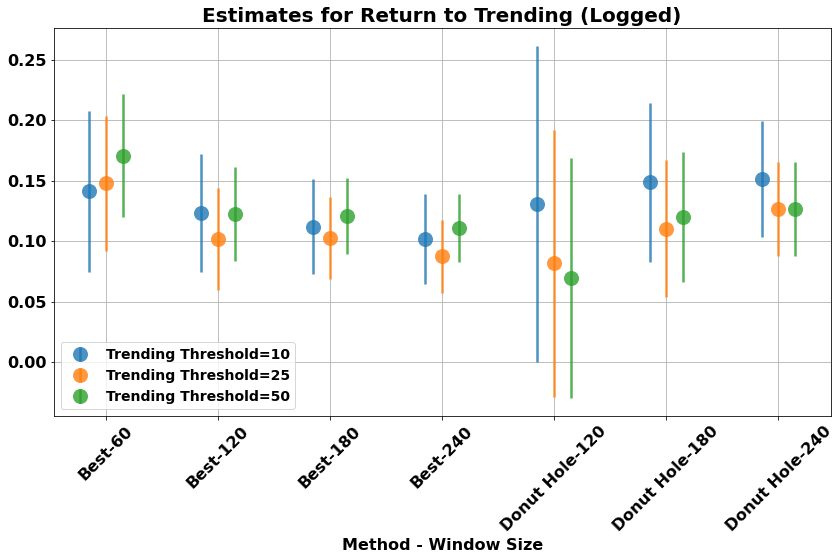

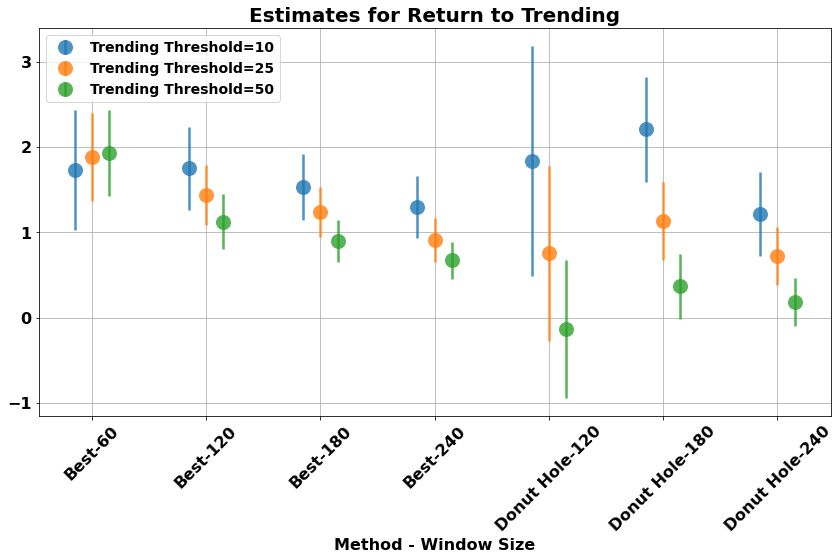

In [76]:
result_dict = {}

formulas = ["ln_regular ~ time*threshold + ln_nonzero_exposure_regular", 
            "regular ~ time*threshold + nonzero_exposure_regular"]
titles = ['Estimates for Return to Trending (Logged)', 'Estimates for Return to Trending']
fnames = ['log_trending_estimates.png', 'trending_estimates.png']

for formula, title, fname in zip(formulas, titles, fnames):
    for opts, panel_df in df_dict.items():
        cutoff_choice, trending_thresh = opts   

        for end_time in [60, 120, 180, 240]:        
            query = panel_df.query(f'time >= -{end_time} and time <= {end_time}')
            query.hashtag = pd.Categorical(query.hashtag).codes
            for col in ['regular', 'nonzero_exposure_regular']:
                def log(x):
                    if x == 0:
                        return 0
                    else:
                        return np.log(x)
                query['ln_' + col] = query[col].apply(log)
            mod = smf.mixedlm(formula, data=query, groups=query['hashtag']).fit()
            result_dict[(cutoff_choice, trending_thresh, end_time)] = mod

            # donut hole!
            if cutoff_choice == 'earliest' and end_time != 60:
                query  = query.query('time <= 0 or time > 60')
                mod = smf.mixedlm(formula, data=query, groups=query['hashtag']).fit()
                result_dict[('Donut Hole', trending_thresh, end_time)] = mod

    from statsmodels.iolib.summary2 import summary_col


    res_tab = summary_col(list(result_dict.values()), 
                          model_names=[f'{x[0]}-{x[1]}-{x[2]}' for x in result_dict.keys()],
                          stars=True)   

    def plot_coef_with_conf(coefs, stds, xticks, label=None, ax=None, i=0):
        coefs = [float(z.replace('*', '')) for z in coefs.values]
        stds = [2*float(z[1:-1]) for z in stds.values]
        if ax is None:
            fig, ax = plt.subplots()
        ax.errorbar([x+i*.15 for x in range(len(coefs))], coefs, stds, fmt='o', label=label, markersize=15, 
                    alpha=.8, capsize=10)
        ax.set_xticks(range(len(coefs)))
        ax.set_xticklabels(xticks, rotation=45)


    fig, ax = plt.subplots()

    def format_columns(cols):
        new_cols = []
        for col in cols:
            x,_,z = col.split('-')
            new_cols.append(x[0].upper() + x[1:] +'-' + z)
        return new_cols

    for i,n in enumerate([10,25,50]):
        x = select_results(res_tab, ['best', 'Donut Hole'], [n], [60,120,180,240],
                              add_model_param_rows=False)
        ind = x.index.get_loc('Trending')
        plot_coef_with_conf(x.iloc[ind,:], x.iloc[ind+1,:], format_columns(x.columns), 
                            ax=ax, label='Trending Threshold='+str(n), 
                           i=i-1)
    plt.legend()
    plt.grid()
    plt.xlabel('Method - Window Size')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(os.path.join(ASSETS_DIR, fname))

## Experimentation

In [26]:

from statsmodels.formula.api import poisson
from statsmodels.formula.api import negativebinomial

In [69]:
result_dict = {}
#formula_string = "ln_regular ~ time*threshold + ln_nonzero_exposure_regular"
model = negativebinomial
formula_string = "regular ~ time*threshold + nonzero_exposure_regular"

for opts, panel_df in df_dict.items():
    cutoff_choice, trending_thresh = opts   
    
    for end_time in [60, 120, 180, 240]:        
        query = panel_df.query(f'time >= -{end_time} and time <= {end_time}')
        query.hashtag = pd.Categorical(query.hashtag).codes
        for col in ['regular', 'nonzero_exposure_regular']:
            def log(x):
                if x == 0:
                    return 0
                else:
                    return np.log(x)
            query['ln_' + col] = query[col].apply(log)
        mod = model(formula_string, data=query).fit()

#         mod = smf.mixedlm(formula_string, data=query, groups=query['hashtag']).fit()
        result_dict[(cutoff_choice, trending_thresh, end_time)] = mod
        
        # donut hole!
        if cutoff_choice == 'earliest' and end_time != 60:
            query  = query.query('time <= 0 or time > 60')
            mod = model(formula_string, data=query).fit()
            # mod = smf.mixedlm(formula_string, data=query, groups=query['hashtag']).fit()
            result_dict[('Donut Hole', trending_thresh, end_time)] = mod


Optimization terminated successfully.
         Current function value: 3.543550
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 3.330284
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 3.116826
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 2.961397
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 3.028753
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 2.855440
         Iterations: 21
         Function evaluations: 25
  

In [246]:
res_tab

,best-10-60,best-10-120,best-10-180,best-10-240,best-25-60,best-25-120,best-25-180,best-25-240,best-50-60,best-50-120,best-50-180,best-50-240,earliest-10-60,earliest-10-120,Donut Hole-10-120,earliest-10-180,Donut Hole-10-180,earliest-10-240,Donut Hole-10-240,earliest-25-60,earliest-25-120,Donut Hole-25-120,earliest-25-180,Donut Hole-25-180,earliest-25-240,Donut Hole-25-240,earliest-50-60,earliest-50-120,Donut Hole-50-120,earliest-50-180,Donut Hole-50-180,earliest-50-240,Donut Hole-50-240
Intercept,2.3727***,2.3587***,2.4022***,2.4073***,2.3589***,2.1859***,2.0514***,2.0652***,2.1165***,2.1551***,2.0230***,1.9342***,2.1381***,2.2101***,2.1404***,2.2680***,2.1846***,2.2856***,2.1803***,1.7968***,1.8692***,1.8621***,1.9596***,1.9271***,1.9219***,1.8775***,1.3790***,1.4525***,1.4687***,1.4082***,1.4307***,1.3103***,1.3229***
,(0.0784),(0.0706),(0.0675),(0.0687),(0.0642),(0.0588),(0.0599),(0.0509),(0.0732),(0.0571),(0.0557),(0.0527),(0.1223),(0.0908),(0.1096),(0.0856),(0.1065),(0.0886),(0.1139),(0.1039),(0.0793),(0.0857),(0.0636),(0.0653),(0.0629),(0.0633),(0.1198),(0.1108),(0.1096),(0.1030),(0.1021),(0.0995),(0.0986)
time,0.0051**,0.0085***,0.0114***,0.0122***,0.0140***,0.0084***,0.0070***,0.0080***,0.0168***,0.0172***,0.0127***,0.0107***,0.0065*,0.0092***,0.0083***,0.0126***,0.0117***,0.0133***,0.0124***,0.0040,0.0048***,0.0048***,0.0088***,0.0088***,0.0086***,0.0085***,0.0124***,0.0106***,0.0107***,0.0087***,0.0087***,0.0068***,0.0068***
,(0.0025),(0.0016),(0.0012),(0.0009),(0.0022),(0.0013),(0.0009),(0.0006),(0.0030),(0.0016),(0.0011),(0.0007),(0.0034),(0.0018),(0.0019),(0.0013),(0.0014),(0.0011),(0.0012),(0.0031),(0.0014),(0.0014),(0.0008),(0.0008),(0.0006),(0.0006),(0.0043),(0.0020),(0.0020),(0.0012),(0.0012),(0.0009),(0.0009)
threshold,0.0889,-0.0621,-0.1882**,-0.2557***,0.1991**,0.0455,-0.0313,-0.1551***,0.3035***,0.0166,0.0174,0.0163,-0.0203,-0.0801,-0.2603,-0.1567*,-0.1905,-0.2234**,-0.3374**,0.2289**,0.2528***,-0.1079,0.0618,-0.2362,0.0125,-0.2663**,0.3867***,0.6054***,0.4411*,0.6031***,0.3697**,0.6458***,0.4455***
,(0.0904),(0.0807),(0.0743),(0.0708),(0.0829),(0.0691),(0.0642),(0.0560),(0.0849),(0.0676),(0.0661),(0.0635),(0.1213),(0.1035),(0.2266),(0.0947),(0.1730),(0.0943),(0.1632),(0.1151),(0.0852),(0.2991),(0.0732),(0.1467),(0.0726),(0.1081),(0.1410),(0.1249),(0.2428),(0.1161),(0.1501),(0.1126),(0.1285)
time:threshold,-0.0057**,-0.0089***,-0.0117***,-0.0123***,-0.0225***,-0.0104***,-0.0080***,-0.0084***,-0.0272***,-0.0193***,-0.0138***,-0.0115***,-0.0034,-0.0079***,-0.0057**,-0.0122***,-0.0113***,-0.0128***,-0.0112***,-0.0017,-0.0050***,-0.0016,-0.0092***,-0.0071***,-0.0087***,-0.0071***,-0.0079*,-0.0106***,-0.0091***,-0.0088***,-0.0072***,-0.0072***,-0.0061***
,(0.0028),(0.0017),(0.0012),(0.0010),(0.0029),(0.0015),(0.0011),(0.0007),(0.0036),(0.0017),(0.0012),(0.0008),(0.0039),(0.0019),(0.0026),(0.0013),(0.0016),(0.0011),(0.0012),(0.0036),(0.0016),(0.0035),(0.0009),(0.0013),(0.0007),(0.0008),(0.0046),(0.0021),(0.0031),(0.0013),(0.0014),(0.0009),(0.0010)
nonzero_exposure_regular,0.0169***,0.0182***,0.0191***,0.0198***,0.0270***,0.0296***,0.0309***,0.0323***,0.0268***,0.0295***,0.0314***,0.0328***,0.0172***,0.0182***,0.0205***,0.0190***,0.0214***,0.0198***,0.0226***,0.0308***,0.0292***,0.0298***,0.0306***,0.0318***,0.0320***,0.0336***,0.0299***,0.0289***,0.0287***,0.0311***,0.0322***,0.0327***,0.0342***
,(0.0017),(0.0014),(0.0014),(0.0014),(0.0015),(0.0017),(0.0018),(0.0019),(0.0014),(0.0016),(0.0018),(0.0019),(0.0019),(0.0014),(0.0013),(0.0013),(0.0011),(0.0014),(0.0012),(0.0019),(0.0017),(0.0020),(0.0017),(0.0021),(0.0018),(0.0023),(0.0017),(0.0016),(0.0020),(0.0017),(0.0022),(0.0018),(0.0025)


In [70]:
from statsmodels.iolib.summary2 import summary_col


res_tab = summary_col(list(result_dict.values()), 
                      model_names=[f'{x[0]}-{x[1]}-{x[2]}' for x in result_dict.keys()],
                      stars=True)   
res_tab

,best-10-60,best-10-120,best-10-180,best-10-240,best-25-60,best-25-120,best-25-180,best-25-240,best-50-60,best-50-120,best-50-180,best-50-240,earliest-10-60,earliest-10-120,Donut Hole-10-120,earliest-10-180,Donut Hole-10-180,earliest-10-240,Donut Hole-10-240,earliest-25-60,earliest-25-120,Donut Hole-25-120,earliest-25-180,Donut Hole-25-180,earliest-25-240,Donut Hole-25-240,earliest-50-60,earliest-50-120,Donut Hole-50-120,earliest-50-180,Donut Hole-50-180,earliest-50-240,Donut Hole-50-240
Intercept,1.9522***,1.9606***,1.8891***,1.7973***,1.4440***,1.3142***,1.1484***,1.0463***,1.3664***,1.2040***,0.9721***,0.8207***,1.4663***,1.6031***,1.4118***,1.6352***,1.4904***,1.5461***,1.4190***,0.8802***,0.9540***,0.8179***,0.9026***,0.7945***,0.7489***,0.6555***,0.6651***,0.5827***,0.4263***,0.4501***,0.3465***,0.3235***,0.2386***
,(0.0795),(0.0722),(0.0673),(0.0637),(0.0692),(0.0606),(0.0544),(0.0515),(0.0643),(0.0545),(0.0490),(0.0460),(0.1087),(0.0904),(0.1059),(0.0806),(0.0891),(0.0733),(0.0783),(0.0852),(0.0717),(0.0840),(0.0643),(0.0718),(0.0578),(0.0630),(0.0844),(0.0668),(0.0769),(0.0585),(0.0638),(0.0537),(0.0575)
time,0.0074***,0.0118***,0.0125***,0.0120***,0.0111***,0.0094***,0.0079***,0.0069***,0.0159***,0.0126***,0.0088***,0.0066***,0.0054*,0.0113***,0.0111***,0.0127***,0.0121***,0.0121***,0.0116***,0.0075***,0.0084***,0.0086***,0.0077***,0.0075***,0.0059***,0.0057***,0.0130***,0.0085***,0.0084***,0.0055***,0.0053***,0.0040***,0.0039***
,(0.0022),(0.0011),(0.0008),(0.0006),(0.0019),(0.0009),(0.0006),(0.0004),(0.0019),(0.0009),(0.0005),(0.0004),(0.0030),(0.0013),(0.0015),(0.0009),(0.0010),(0.0007),(0.0007),(0.0024),(0.0011),(0.0012),(0.0007),(0.0007),(0.0005),(0.0005),(0.0025),(0.0010),(0.0011),(0.0006),(0.0006),(0.0004),(0.0004)
threshold,0.1548,-0.0060,-0.0346,-0.0594,0.1764*,0.1726**,0.2018***,0.1870***,0.1549*,0.2044***,0.2970***,0.3343***,0.0975,0.1123,0.2310,0.1624*,0.3926**,0.1961**,0.3408***,0.2329**,0.2987***,0.3748,0.4031***,0.5566***,0.5100***,0.6094***,0.2799**,0.5645***,0.6043**,0.7518***,0.8859***,0.8351***,0.9030***
,(0.1110),(0.0925),(0.0830),(0.0762),(0.0913),(0.0777),(0.0690),(0.0630),(0.0860),(0.0695),(0.0618),(0.0566),(0.1478),(0.1130),(0.3223),(0.0960),(0.1628),(0.0853),(0.1182),(0.1156),(0.0910),(0.2640),(0.0780),(0.1360),(0.0696),(0.1008),(0.1146),(0.0851),(0.2401),(0.0723),(0.1226),(0.0656),(0.0925)
time:threshold,-0.0119***,-0.0146***,-0.0153***,-0.0141***,-0.0168***,-0.0134***,-0.0116***,-0.0096***,-0.0210***,-0.0166***,-0.0122***,-0.0092***,-0.0004,-0.0111***,-0.0121***,-0.0144***,-0.0155***,-0.0141***,-0.0143***,-0.0062*,-0.0095***,-0.0106***,-0.0103***,-0.0111***,-0.0086***,-0.0090***,-0.0085**,-0.0090***,-0.0100***,-0.0077***,-0.0087***,-0.0065***,-0.0068***
,(0.0032),(0.0014),(0.0009),(0.0007),(0.0027),(0.0012),(0.0007),(0.0005),(0.0025),(0.0011),(0.0007),(0.0005),(0.0042),(0.0017),(0.0036),(0.0011),(0.0015),(0.0008),(0.0009),(0.0033),(0.0014),(0.0030),(0.0008),(0.0012),(0.0006),(0.0007),(0.0033),(0.0013),(0.0027),(0.0007),(0.0011),(0.0005),(0.0006)
nonzero_exposure_regular,0.0376***,0.0429***,0.0480***,0.0521***,0.0680***,0.0747***,0.0850***,0.0899***,0.0715***,0.0778***,0.0882***,0.0938***,0.0476***,0.0473***,0.0575***,0.0487***,0.0557***,0.0527***,0.0591***,0.0904***,0.0840***,0.0971***,0.0862***,0.0952***,0.0920***,0.1002***,0.0912***,0.0867***,0.1066***,0.0898***,0.1020***,0.0961***,0.1068***
,(0.0016),(0.0014),(0.0014),(0.0014),(0.0024),(0.0021),(0.0020),(0.0019),(0.0023),(0.0020),(0.0019),(0.0018),(0.0025),(0.0018),(0.0028),(0.0016),(0.0021),(0.0015),(0.0018),(0.0035),(0.0025),(0.0037),(0.0022),(0.0029),(0.0021),(0.0026),(0.0036),(0.0025),(0.0041),(0.0021),(0.0029),(0.0020),(0.0025)


['0.1548' '-0.0060' '-0.0346' '-0.0594' '0.2310' '0.3926**' '0.3408***']
['0.1764*' '0.1726**' '0.2018***' '0.1870***' '0.3748' '0.5566***'
 '0.6094***']
['0.1549*' '0.2044***' '0.2970***' '0.3343***' '0.6043**' '0.8859***'
 '0.9030***']


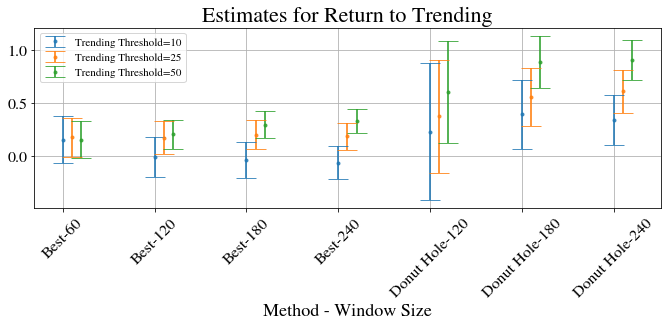

In [71]:
def plot_coef_with_conf(coefs, stds, xticks, label=None, ax=None, i=0):
    print(coefs.values)
    coefs = [float(z.replace('*', '')) for z in coefs.values]
    stds = [2*float(z[1:-1]) for z in stds.values]
    if ax is None:
        fig, ax = plt.subplots()
    ax.errorbar([x+i*.1 for x in range(len(coefs))], coefs, stds, fmt='o', label=label, alpha=.8,
               capsize=10)
    ax.set_xticks(range(len(coefs)))
    ax.set_xticklabels(xticks, rotation=45)
    

fig, ax = plt.subplots()

def format_columns(cols):
    new_cols = []
    for col in cols:
        x,_,z = col.split('-')
        new_cols.append(x[0].upper() + x[1:] +'-' + z)
    return new_cols

for i,n in enumerate([10,25,50]):
    x = select_results(res_tab, ['best', 'Donut Hole'], [n], [60,120,180,240],
                          add_model_param_rows=False)
    ind = x.index.get_loc('Trending')
 
    plot_coef_with_conf(x.iloc[ind,:], x.iloc[ind+1,:], format_columns(x.columns), 
    #     plot_coef_with_conf(x.iloc[4,:], x.iloc[5,:], format_columns(x.columns), 
                        ax=ax, label='Trending Threshold='+str(n), 
                       i=i)
plt.legend()
plt.grid()
plt.xlabel('Method - Window Size')
plt.title('Estimates for Return to Trending')
plt.tight_layout()

In [31]:
select_results(res_tab, ['Best', 'Donut Hole'], [10,25,50], [180],
                          add_model_param_rows=True, column_type='numbers')


,(1),(2),(3)
Group Var,,,
,,,
Intercept,2.4132***,1.8823***,1.3063***
,(0.0211),(0.0226),(0.0283)
Exposed,0.0213***,0.0313***,0.0310***
,(0.0001),(0.0002),(0.0002)
Trending,-0.1441***,-0.2326***,0.3935***
,(0.0351),(0.0398),(0.0415)
Time,0.0118***,0.0088***,0.0086***
,(0.0003),(0.0003),(0.0004)


## Full Regression Tables

In [59]:
x

,best-50-60,best-50-120,best-50-180,best-50-240,Donut Hole-50-120,Donut Hole-50-180,Donut Hole-50-240
Group Var,0.1542***,0.1006***,0.0741***,0.0650***,0.1563***,0.1160***,0.1052***
,(0.0365),(0.0233),(0.0171),(0.0144),(0.0395),(0.0272),(0.0234)
Intercept,0.3812*,0.3955***,0.4206***,0.3502***,0.1028***,0.0956***,0.0877***
,(0.2088),(0.1439),(0.1103),(0.1001),(0.0186),(0.0161),(0.0142)
Exposed (logged),,,,,0.9955***,0.9876***,0.9913***
,,,,,(0.0064),(0.0051),(0.0042)
Exposed,1.0779***,1.0821***,1.0813***,1.0872***,,,
,(0.0050),(0.0035),(0.0028),(0.0026),,,
Trending,1.9354***,1.1261***,0.8964***,0.6732***,0.0691,0.1198***,0.1265***
,(0.2524),(0.1624),(0.1222),(0.1078),(0.0497),(0.0270),(0.0194)


In [58]:
res_tab

,best-10-60,best-10-120,best-10-180,best-10-240,best-25-60,best-25-120,best-25-180,best-25-240,best-50-60,best-50-120,best-50-180,best-50-240,earliest-10-60,earliest-10-120,Donut Hole-10-120,earliest-10-180,Donut Hole-10-180,earliest-10-240,Donut Hole-10-240,earliest-25-60,earliest-25-120,Donut Hole-25-120,earliest-25-180,Donut Hole-25-180,earliest-25-240,Donut Hole-25-240,earliest-50-60,earliest-50-120,Donut Hole-50-120,earliest-50-180,Donut Hole-50-180,earliest-50-240,Donut Hole-50-240
Group Var,0.2285***,0.2810*,0.1220***,0.1030***,0.1276***,0.1297***,0.0779***,0.0662***,0.1542***,0.1006***,0.0741***,0.0650***,0.2394***,0.1655***,0.2263***,0.1286***,0.1869***,0.1003***,0.1457***,0.0966***,0.1060***,0.1701***,0.0702***,0.2041***,0.0627***,0.1082***,0.0922***,0.1119***,0.1563***,0.0755***,0.1160***,0.0628***,0.1052***
,(0.0722),(0.1503),(0.0367),(0.0303),(0.0289),(0.0326),(0.0200),(0.0165),(0.0365),(0.0233),(0.0171),(0.0144),(0.0768),(0.0511),(0.0754),(0.0389),(0.0534),(0.0299),(0.0444),(0.0304),(0.0283),(0.0472),(0.0173),(0.0768),(0.0160),(0.0268),(0.0257),(0.0262),(0.0395),(0.0176),(0.0272),(0.0143),(0.0234)
Intercept,0.9459***,0.5929**,0.6023***,0.5225***,0.5684***,0.3742**,0.2933**,0.2706**,0.3812*,0.3955***,0.4206***,0.3502***,1.0852***,0.6924***,0.1701***,0.6443***,0.1612***,0.4722**,0.1337***,0.3780*,0.2329,0.1153***,0.3437**,0.1119***,0.2991**,0.0981***,0.5014**,0.5317***,0.1028***,0.4798***,0.0956***,0.4033***,0.0877***
,(0.3205),(0.2807),(0.1956),(0.1887),(0.2121),(0.1646),(0.1341),(0.1219),(0.2088),(0.1439),(0.1103),(0.1001),(0.2999),(0.2628),(0.0285),(0.2050),(0.0231),(0.1911),(0.0196),(0.2064),(0.1903),(0.0219),(0.1414),(0.0202),(0.1248),(0.0151),(0.2082),(0.1560),(0.0186),(0.1186),(0.0161),(0.1038),(0.0142)
ln_nonzero_exposure_regular,,,,,,,,,,,,,,,0.9826***,,0.9740***,,0.9821***,,,0.9989***,,0.9948***,,0.9998***,,,0.9955***,,0.9876***,,0.9913***
,,,,,,,,,,,,,,,(0.0077),,(0.0058),,(0.0048),,,(0.0064),,(0.0050),,(0.0040),,,(0.0064),,(0.0051),,(0.0042)
nonzero_exposure_regular,1.0452***,1.0573***,1.0587***,1.0610***,1.0686***,1.0743***,1.0818***,1.0886***,1.0779***,1.0821***,1.0813***,1.0872***,1.0392***,1.0617***,,1.0601***,,1.0662***,,1.0715***,1.0892***,,1.0864***,,1.0913***,,1.0913***,1.0905***,,1.0873***,,1.0911***,
,(0.0047),(0.0034),(0.0027),(0.0026),(0.0052),(0.0036),(0.0030),(0.0028),(0.0050),(0.0035),(0.0028),(0.0026),(0.0045),(0.0034),,(0.0027),,(0.0026),,(0.0057),(0.0040),,(0.0031),,(0.0028),,(0.0058),(0.0036),,(0.0028),,(0.0025),
threshold,1.7338***,1.7519***,1.5316***,1.3033***,1.8850***,1.4419***,1.2397***,0.9073***,1.9354***,1.1261***,0.8964***,0.6732***,-0.1101,0.1795,0.1310**,0.8198***,0.1487***,0.7643***,0.1514***,0.2515,0.4891**,0.0816,0.6721***,0.1102***,0.6125***,0.1266***,-0.2178,0.1218,0.0691,0.3338**,0.1198***,0.3172***,0.1265***
,(0.3540),(0.2449),(0.1922),(0.1815),(0.2595),(0.1758),(0.1455),(0.1286),(0.2524),(0.1624),(0.1222),(0.1078),(0.3330),(0.2689),(0.0654),(0.2035),(0.0330),(0.1890),(0.0239),(0.2651),(0.2124),(0.0552),(0.1564),(0.0283),(0.1340),(0.0196),(0.2696),(0.1742),(0.0497),(0.1318),(0.0270),(0.1135),(0.0194)


In [68]:
# with open(os.path.join(ASSETS_DIR, 'best_estimate_norm.tex'), 'w') as f:
#     print(select_results(res_tab, ['best'], [10,25,50], [120, 180],
#                           add_model_param_rows=True, column_type='numbers').to_latex(),
#          file=f)
    
# with open(os.path.join(ASSETS_DIR, 'donut_hole_estimate_norm.tex'), 'w') as f:
#     print(select_results(res_tab, ['Donut Hole'], [10,25,50], [120, 180],
#                           add_model_param_rows=True, column_type='numbers').to_latex(),
#          file=f)

In [72]:
with open(os.path.join(ASSETS_DIR, 'best_estimate_loh.tex'), 'w') as f:
    print(select_results(res_tab, ['best'], [10,25,50], [120, 180],
                          add_model_param_rows=True, column_type='numbers').to_latex(),
         file=f)
    
with open(os.path.join(ASSETS_DIR, 'donut_hole_estimate_log.tex'), 'w') as f:
    print(select_results(res_tab, ['Donut Hole'], [10,25,50], [120, 180],
                          add_model_param_rows=True, column_type='numbers').to_latex(),
         file=f)

## Playing with Exposure Threshold

In [77]:
result_dict = {}

#formula_string = "ln_regular ~ time*threshold + ln_nonzero_exposure_regular"
#formula_string = "ln_regular ~ time*threshold + ln_nonzero_exposure_regular"
formula_string = "greater_1_exposure_regular ~ time*threshold + leq_1_exposure_regular"

for opts, panel_df in df_dict.items():
    cutoff_choice, trending_thresh = opts   
    
    for end_time in [60, 120, 180, 240]:        
        query = panel_df.query(f'time >= -{end_time} and time <= {end_time}')
        query.hashtag = pd.Categorical(query.hashtag).codes
        for col in ['regular', 'nonzero_exposure_regular']:
            def log(x):
                if x == 0:
                    return 0
                else:
                    return np.log(x)
            query['ln_' + col] = query[col].apply(log)
        mod = smf.mixedlm(formula_string, data=query, groups=query['hashtag']).fit()
        result_dict[(cutoff_choice, trending_thresh, end_time)] = mod
        
        # donut hole!
        if cutoff_choice == 'earliest' and end_time != 60:
            query  = query.query('time <= 0 or time > 60')
            mod = smf.mixedlm(formula_string, data=query, groups=query['hashtag']).fit()
            result_dict[('Donut Hole', trending_thresh, end_time)] = mod


In [78]:
from statsmodels.iolib.summary2 import summary_col


res_tab = summary_col(list(result_dict.values()), 
                      model_names=[f'{x[0]}-{x[1]}-{x[2]}' for x in result_dict.keys()],
                      stars=True)    

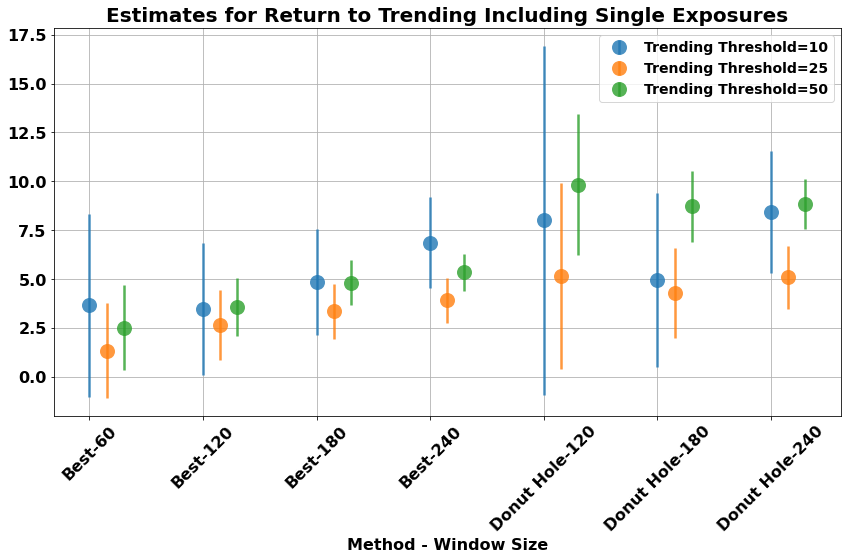

In [81]:
fig, ax = plt.subplots()

for i,n in enumerate([10,25,50]):
    x = select_results(res_tab, ['best', 'Donut Hole'], [n], [60,120,180,240],
                          add_model_param_rows=False)
    plot_coef_with_conf(x.iloc[4,:], x.iloc[5,:], format_columns(x.columns), 
                        ax=ax, label='Trending Threshold='+str(n), 
                       i=i)

plt.legend()
plt.grid()
plt.xlabel('Method - Window Size')
plt.title('Estimates for Return to Trending Including Single Exposures')
plt.tight_layout()
plt.savefig(os.path.join(ASSETS_DIR, 'single_exposure_trending_estimates.png'))

# Specification Curve Tangent

In [6]:
df_dict.keys()

dict_keys([('best', 10), ('best', 25), ('best', 50), ('earliest', 10), ('earliest', 25), ('earliest', 50)])

Fit complete


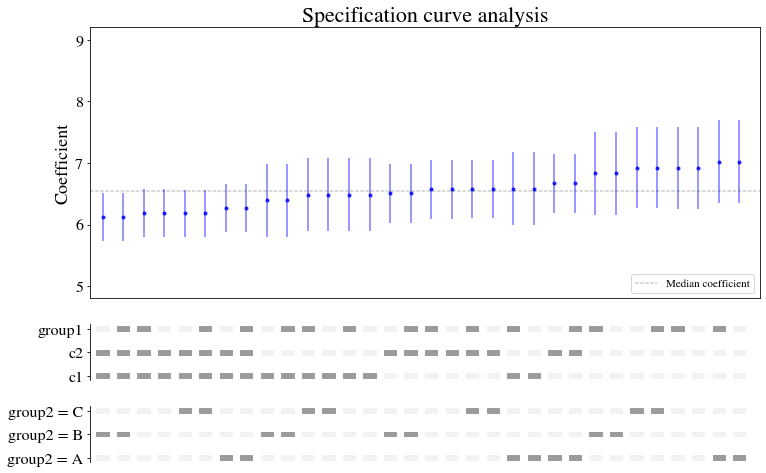

In [59]:
import specification_curve_2 as specy
from specification_curve import example as scdata
df = scdata.load_example_data1()

y_endog = 'y1'
x_exog = 'x1'
controls = ['c1', 'c2', 'group1', 'group2']
sc = specy.SpecificationCurve(df, y_endog, x_exog, controls,
                              cat_expand=['group2'])
sc.fit()
sc.plot()

In [7]:
spec_dfs = []
for opts, panel_df in df_dict.items():
    cutoff_choice, trending_thresh = opts   
    
    for end_time in [60, 120, 180, 240]:        
        query = panel_df.query(f'time >= {end_time} and time <= {end_time}')
        query.hashtag = pd.Categorical(query.hashtag).codes

        query['trending_threshold'] = trending_thresh
        query['window_length'] = end_time
        query['cutoff_choice'] = cutoff_choice
        
        spec_dfs.append(query)
        
        # donut hole!
        if cutoff_choice == 'earliest' and end_time != 60:
            query  = query.query('time <= 0 or time > 60')
            query.hashtag = pd.Categorical(query.hashtag).codes
            query['cutoff_choice'] = 'donut hole'
            spec_dfs.append(query)


In [8]:
spec_df = pd.concat(spec_dfs)

In [9]:
spec_df.columns

Index(['template', 'template_retweet', 'regular', 'regular_retweet',
       'greater_1_exposure_regular', 'leq_1_exposure_regular',
       'nonzero_exposure_regular', 'zero_exposure_regular', 'total_engagement',
       'rt_engagement', 'hashtag', 'time', 'time_i', 'time_i2',
       'trending_start', 'inferred_trending_start', 'threshold',
       'trending_threshold', 'window_length', 'cutoff_choice'],
      dtype='object')

In [83]:
sc.ctrl_combs

[['hashtag'],
 ['nonzero_exposure_regular', 'hashtag'],
 ['window_length', 'hashtag'],
 ['cutoff_choice', 'hashtag'],
 ['trending_threshold', 'hashtag'],
 ['nonzero_exposure_regular', 'window_length', 'hashtag'],
 ['nonzero_exposure_regular', 'cutoff_choice', 'hashtag'],
 ['nonzero_exposure_regular', 'trending_threshold', 'hashtag'],
 ['window_length', 'cutoff_choice', 'hashtag'],
 ['window_length', 'trending_threshold', 'hashtag'],
 ['cutoff_choice', 'trending_threshold', 'hashtag'],
 ['nonzero_exposure_regular', 'window_length', 'cutoff_choice', 'hashtag'],
 ['nonzero_exposure_regular',
  'window_length',
  'trending_threshold',
  'hashtag'],
 ['nonzero_exposure_regular',
  'cutoff_choice',
  'trending_threshold',
  'hashtag'],
 ['window_length', 'cutoff_choice', 'trending_threshold', 'hashtag'],
 ['nonzero_exposure_regular',
  'window_length',
  'cutoff_choice',
  'trending_threshold',
  'hashtag']]

                     x_exog  y_endog  \
Specification No.                      
0                  template  regular   
1                  template  regular   
2                  template  regular   
3                  template  regular   
4                  template  regular   
5                  template  regular   
6                  template  regular   
7                  template  regular   
8                  template  regular   
9                  template  regular   
10                 template  regular   
11                 template  regular   
12                 template  regular   
13                 template  regular   
14                 template  regular   
15                 template  regular   

                                                             Results  \
Specification No.                                                      
0                  <statsmodels.regression.linear_model.Regressio...   
1                  <statsmodels.regression.linear_model.Regress

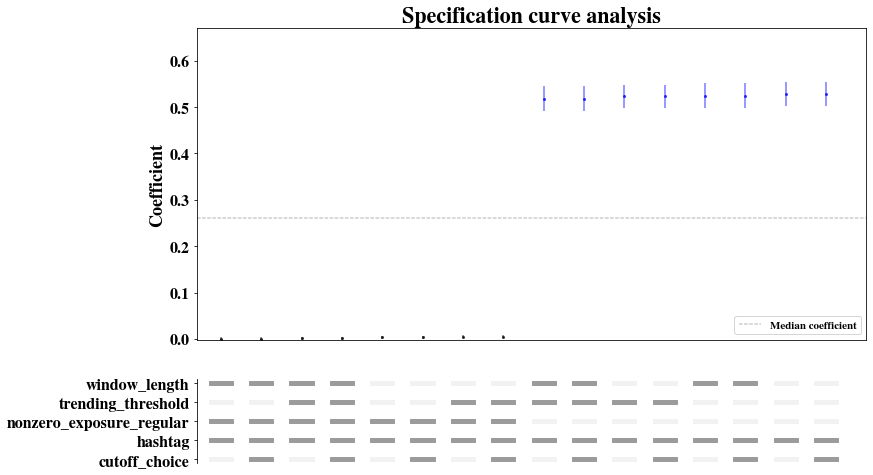

In [89]:
sc.plot()

Index(['regular', 'template', 'nonzero_exposure_regular', 'window_length',
       'cutoff_choice', 'trending_threshold', 'hashtag'],
      dtype='object')
Index(['regular', 'template', 'nonzero_exposure_regular', 'window_length',
       'trending_threshold', 'hashtag', 'cutoff_choice=best',
       'cutoff_choice=donut hole', 'cutoff_choice=earliest'],
      dtype='object')
Index(['regular', 'template', 'nonzero_exposure_regular', 'window_length',
       'cutoff_choice', 'trending_threshold', 'hashtag'],
      dtype='object')
Index(['regular', 'template', 'nonzero_exposure_regular', 'window_length',
       'trending_threshold', 'hashtag', 'cutoff_choice=best',
       'cutoff_choice=donut hole', 'cutoff_choice=earliest'],
      dtype='object')
Index(['regular', 'template', 'nonzero_exposure_regular', 'window_length',
       'cutoff_choice', 'trending_threshold', 'hashtag'],
      dtype='object')
Index(['regular', 'template', 'nonzero_exposure_regular', 'window_length',
       'trending_t

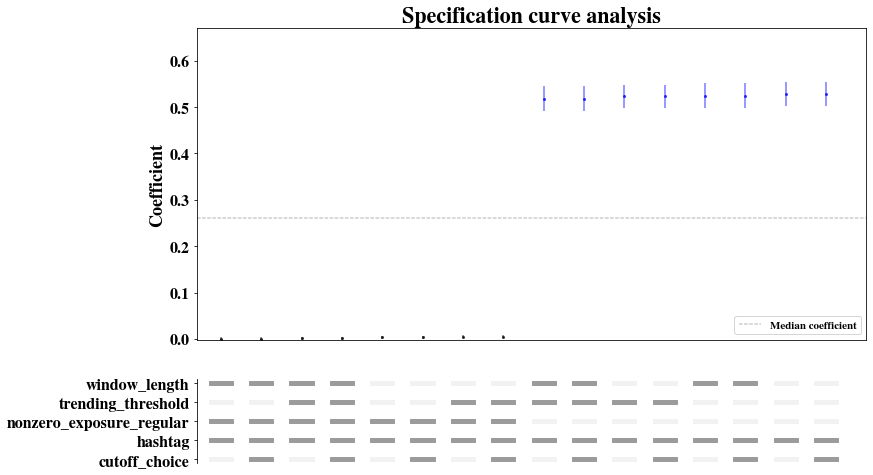

In [88]:
import statsmodels.api as sm
import specification_curve_2 as specy
y_endog = 'regular'
x_exog = 'template'
controls = ['nonzero_exposure_regular', 'window_length', 'cutoff_choice', 'trending_threshold']
def fit_func(df, xf, y_endog, x_endog, reg_vars_here):
    print(df.columns)
    print(xf.columns)
    return sm.OLS(xf[y_endog], xf[[x_endog] + reg_vars_here]).fit()

sc = specy.SpecificationCurve(spec_df, y_endog, x_exog, controls,
                              always_include=['hashtag'], 
                              fit_function=fit_func)
#                               cat_expand=['cutoff_choice', 'window_length', 'trending_threshold'])
sc.fit()
sc.plot()

In [54]:
len(df_dict[('best', 10)].hashtag.unique())

31

In [55]:
len(df_dict[('best', 25)].hashtag.unique())

49

In [56]:
len(df_dict[('best', 50)].hashtag.unique())

62

In [70]:
def select_results(tab, cutoff_choices, trending_thresholds, windows):
    var_map = {'time': 'Time', 'threshold': 'Trending', 'time:threshold': 'Time#Trending', 
              'nonzero_exposure_regular': 'Exposed'}

    temp = tab.tables[0]    
    columns = []
    for col in temp.columns:
        x,y,z = col.split('-')

        if x in cutoff_choices and int(y) in trending_thresholds and int(z) in windows:
            columns.append(col)
    
    temp = temp[columns]
    temp.columns = pd.MultiIndex.from_tuples([tuple(x.split('-')) for x in temp.columns], 
                                             names=['Cutoff Choice', 'Trending Threshold', 'Time after Trending'])
    temp.index = [var_map.get(x, x) for x in temp.index]
    
    return temp

In [87]:
x = select_results(res_tab, ['best', 'Donut Hole'], 
              [10, 25, 50], [60, 120, 180])

In [89]:
print(x.to_latex())

\begin{tabular}{llll}
\toprule
{} &         (1) &         (2) &         (3) \\
\midrule
Intercept           &   0.7739*** &     0.3607* &   0.5511*** \\
                    &    (0.2840) &    (0.1868) &    (0.1740) \\
Time                &      0.0114 &      0.0035 &      0.0031 \\
                    &    (0.0072) &    (0.0046) &    (0.0045) \\
Trending            &   2.0341*** &   1.2955*** &      0.3038 \\
                    &    (0.3906) &    (0.2547) &    (0.2496) \\
Time\#Trending       &  -0.0248*** &   -0.0103** &     -0.0057 \\
                    &    (0.0076) &    (0.0049) &    (0.0048) \\
Exposed             &   1.0667*** &   1.0787*** &   1.0914*** \\
                    &    (0.0039) &    (0.0038) &    (0.0039) \\
Group Var           &   0.1243*** &   0.1471*** &   0.1042*** \\
                    &    (0.0413) &    (0.0378) &    (0.0255) \\
Cutoff Choice       &  Donut Hole &  Donut Hole &  Donut Hole \\
Trending Threshold  &          10 &          25 &          50 \\
T

In [ ]:
pd.Series

In [39]:
t = pd.DataFrame.from_dict({'(1)': [25], '(2)': [50]})#, index=['Threshold'])
t.index = ['Threshold']

In [40]:
t

,(1),(2)
Threshold,25,50


In [41]:
x.append(t)

,(1),(2)
Intercept,0.3607*,0.5511***
,(0.1868),(0.1740)
Time,0.0035,0.0031
,(0.0046),(0.0045)
Trending,1.2955***,0.3038
,(0.2547),(0.2496)
Time#Trending,-0.0103**,-0.0057
,(0.0049),(0.0048)
Exposed,1.0787***,1.0914***
,(0.0038),(0.0039)


In [78]:
with open(os.path.join(ASSETS_DIR, 'trending_effect_regression_2.tex'), 'w') as f:
    print(temp.to_latex(), file=f)